In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls /content/gdrive/'My Drive'/'combined_data.csv'

'/content/gdrive/My Drive/combined_data.csv'


In [3]:
inp_file0 = pd.read_csv('/content/gdrive/My Drive/combined_data.csv', encoding='utf-8')
print(inp_file0.columns)

Index(['source_name', 'url', 'created_date', 'tag', 'heading', 'author',
       'article_text', 'label'],
      dtype='object')


In [0]:
# regular 0 non regular all others
inp_file0['label'] = inp_file0['label'].apply(lambda x: 'regular' if x=='regular' else 'other')

In [5]:
inp_file0.head()

,source_name,url,created_date,tag,heading,author,article_text,label
0,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-06-29 00:00:00,"homes, construction, larkfield, estates, worke...",Larkfield\xe2\x80\x99s returning residents cop...,GUY KOVNER,\nHaley and Fletcher Skerrett loved suburban L...,regular
1,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-16 00:00:00,"hospital, fire, rosa, santa, tito, fires, jose...",'You felt more normal': St. Joseph Health empl...,MARTIN ESPINOZA,\nThere is little sign today of the smoke-lace...,regular
2,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-23 00:00:00,"sandy, sonoma, angie, center, luz, sisters, co...",Sonoma Valley sisters join forces to give fire...,DIANNE REBER HART,\nWhen the North Bay wildfires broke out in 20...,regular
3,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-03 00:00:00,"campus, teachers, hidden, students, valley, sa...",Santa Rosa teachers rebuild sense of safety on...,MATT VILLANO,\nThe rebuilding process has taken many forms ...,regular
4,Press Democrat,https://www.pressdemocrat.com/specialsections/...,2019-07-01 00:00:00,"fire, montecito, heights, neighbors, flames, n...",\xe2\x80\x98I had to get it down\xe2\x80\x99: ...,CHRIS SMITH,\nWe\xe2\x80\x99ll never know if retired schoo...,regular


In [6]:
print(inp_file0['label'].unique())

['regular' 'other']


In [7]:
# the news sources being covered currently
print(inp_file0['source_name'].unique())

['Press Democrat' 'NW Florida Daily' 'Gazette-mail'
 'Washington Observer Report' 'Californian' 'New York Times' 'Enid News'
 'NJSpotlight' 'Digital Journal']


In [0]:
inp_file = inp_file0.groupby(['source_name','author']).size().reset_index(name='counts')

In [0]:
import matplotlib.pyplot as plt
def plot_graph(df, title):
  plt.bar(df.loc[:, 'author'], df.loc[:, 'counts'], align='center')
  plt.xticks(rotation=90)
  plt.xlabel('Author Name')
  plt.ylabel('No of articles')
  plt.title(title)
  

In [174]:
regular = inp_file2[inp_file2['label'].str.match('regular')].sort_values('counts', ascending=False)
df1 = regular.iloc[1:10, 1:3]
df1

,author,counts
4461,Tim Sandle,700
2428,Cass Rains,588
3421,Karen Graham,578
4435,The Bakersfield Californian,571
4337,Staff,553
3823,Mitchell Willetts,479
3164,James Neal,442
2768,Enid News & Eagle,429
4342,Staff report,359


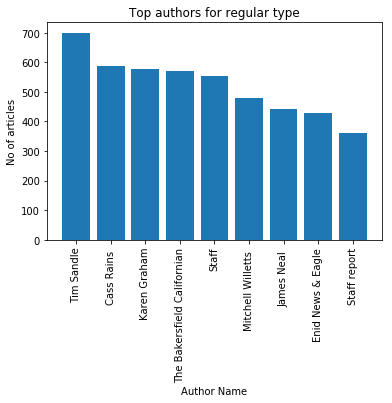

In [175]:
plot_graph(df1, 'Top authors for regular type')

In [176]:
non_regular = inp_file2[inp_file2['label'].str.match('other')].sort_values('counts', ascending=False)
df2 = non_regular.iloc[1:10, 1:3]
df2

,author,counts
849,Ken Hanly,97
1165,Paul Wallis,92
1400,THE EDITORIAL BOARD,88
619,James Neal,76
658,Jeff Mullin,73
1128,Not available,63
327,Dave Ruthenberg,43
335,David Christy,40
814,Karen Graham,38


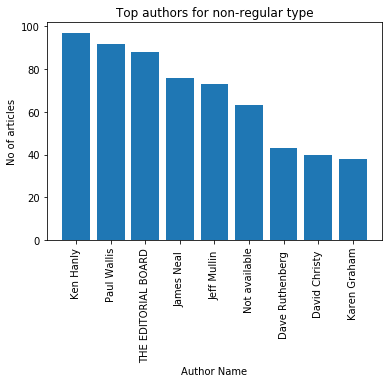

In [177]:
plot_graph(df2, 'Top authors for non-regular type')

In [0]:
# across sources who are top authors for regular vs non-regular
inp_file2 = inp_file0.groupby(['label','author']).size().reset_index(name='counts')

In [47]:
ny_times = inp_file[inp_file['source_name'].str.match('New York Times')].sort_values('counts', ascending=False)
df = ny_times.iloc[1:10, 1:3]
df

,author,counts
3509,The Editorial Board,37
3508,The Associated Press,33
3511,The New York Times,32
3193,Katie Rogers,20
3237,Maggie Haberman,20
2904,Charles McDermid,20
2913,Chris Stanford,17
3192,Katie Benner,16
3154,Jonathan Martin,16


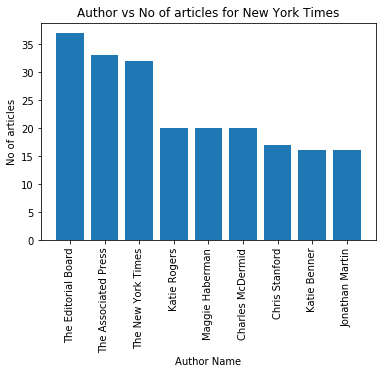

In [48]:
plot_graph(df, 'Author vs No of articles for New York Times')

In [0]:
wa_observer = inp_file[inp_file['source_name'].str.match('Washington Observer Report')].sort_values('counts', ascending=False)
wa_observer[['author_fname', 'author_lname', 'email']] = wa_observer['author'].str.split(' ', 2, expand=True)

In [128]:
wa_observer.columns

Index(['source_name', 'author', 'counts', 'author_fname', 'author_lname',
       'email'],
      dtype='object')

In [0]:
df = wa_observer.iloc[0:10, 1:5]

In [0]:
df['author_lname'].fillna(value='', inplace=True)

In [139]:
df

,author,counts,author_fname,author_lname
4585,Staff,568,Staff,
4574,Rick Shrum Business writer rshrum@observer-rep...,83,Rick,Shrum
4533,Katie Anderson Staff writer kanderson@observer...,72,Katie,Anderson
4457,Barbara S. Miller Staff writer bmiller@observe...,71,Barbara,S.
4582,Scott Beveridge Staff writer sbeveridge@observ...,64,Scott,Beveridge
4553,Luke Campbell Staff writer lcampbell@observer-...,54,Luke,Campbell
4523,Jon Andreassi Staff writer jandreassi@observer...,52,Jon,Andreassi
4504,Gideon Bradshaw Staff writer gbradshaw@observe...,44,Gideon,Bradshaw
4455,Associated Press,39,Associated,Press
4507,Harry Funk Staff writer hfunk@thealmanac.net,39,Harry,Funk


In [140]:
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df['author']

4585              Staff 
4574          Rick Shrum
4533      Katie Anderson
4457          Barbara S.
4582     Scott Beveridge
4553       Luke Campbell
4523       Jon Andreassi
4504     Gideon Bradshaw
4455    Associated Press
4507          Harry Funk
Name: author, dtype: object

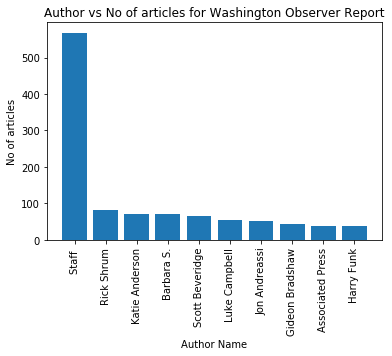

In [141]:
plot_graph(df, 'Author vs No of articles for Washington Observer Report')

In [0]:
californian = inp_file[inp_file['source_name'].str.match('Californian')].sort_values('counts', ascending=False)

In [0]:
californian[['author_fname', 'author_lname', 'email']] = californian['author'].str.split(' ', 2, expand=True)

In [0]:
californian['author'] = californian[['author_fname', 'author_lname']].apply(lambda x: ' '.join(x), axis=1)

In [0]:
df = californian.iloc[1:10, 1:3]

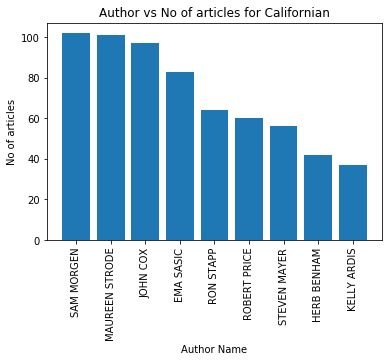

In [120]:
plot_graph(df, 'Author vs No of articles for Californian')

In [118]:
digital_jrnl = inp_file[inp_file['source_name'].str.match('Digital Journal')].sort_values('counts', ascending=False)
df = digital_jrnl.iloc[0:10, 1:3]
df

,author,counts
851,Markos Papadatos,1131
992,Tim Sandle,702
800,Karen Graham,616
808,Ken Hanly,340
909,Paul Wallis,93
499,AFP Apr,60
954,Sarah Gopaul,59
501,AFP Jul,25
592,Business Insider,23
766,"Jerome TAYLOR,",22


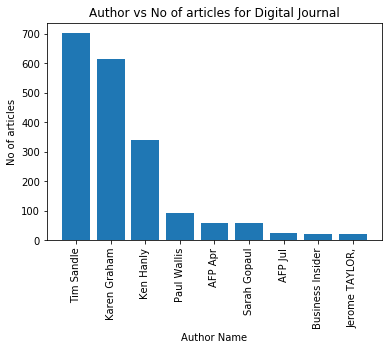

In [55]:
plot_graph(df, 'Author vs No of articles for Digital Journal')

In [117]:
press_democrat = inp_file[inp_file['source_name'].str.match('Press Democrat')].sort_values('counts', ascending=False)
press_democrat['author'] = press_democrat['author'].str.replace('YOU CAN SEND A LETTER TO THE EDITOR AT LETTERS@PRESSDEMOCRAT.COM.', 'THE EDITORIAL BOARD')
df = press_democrat.iloc[0:10, 1:3]
df

,author,counts
3632,ASSOCIATED PRESS,264
4378,THE EDITORIAL BOARD,94
4266,"R,I ROSSMANN",89
4415,WILL SCHMITT,74
4422,THE EDITORIAL BOARD,70
4208,NASHELLY CHAVEZ,68
4405,TYLER SILVY,65
3659,BILL SWINDELL,61
4054,KEVIN FIXLER,59
3922,JEANNE PHILLIPS,57


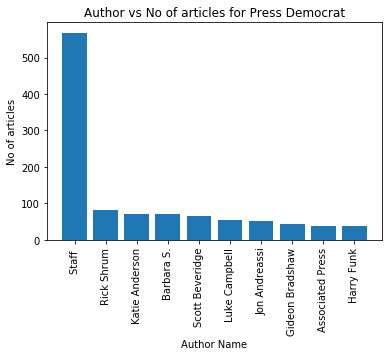

In [142]:
plot_graph(df, 'Author vs No of articles for Press Democrat')

In [147]:
nwf = inp_file[inp_file['source_name'].str.match('NW Florida Daily')].sort_values('counts', ascending=False)
nwf[['author_fname', 'author_lname', 'email']] = nwf['author'].str.split(' ', 2, expand=True)
df = nwf.iloc[0:10, 1:5]
df


,author,counts,author_fname,author_lname
2678,SETH STRINGER @SethSnwfdn,277,SETH,STRINGER
2602,Jim Thompson @Jimtnwfdn,228,Jim,Thompson
2441,By Sam Grubenhoff | 315-4476 | @SamGrubenhoff ...,221,By,Sam
2698,Special to GateHouse Media Florida,197,Special,to
2716,TOM McLAUGHLIN @TomMnwfdn,195,TOM,McLAUGHLIN
2717,TONY JUDNICH @Tonyjnwfdn,174,TONY,JUDNICH
2776,staff report,172,staff,report
2571,GateHouse Media Florida staff report,172,GateHouse,Media
2617,Kaylin Parker @parkerNWFDN,171,Kaylin,Parker
2677,SAVANNAH EVANOFF @SavannahEnwfdn,154,SAVANNAH,EVANOFF


In [148]:
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df['author']


2678       SETH STRINGER
2602        Jim Thompson
2441              By Sam
2698          Special to
2716      TOM McLAUGHLIN
2717        TONY JUDNICH
2776        staff report
2571     GateHouse Media
2617       Kaylin Parker
2677    SAVANNAH EVANOFF
Name: author, dtype: object

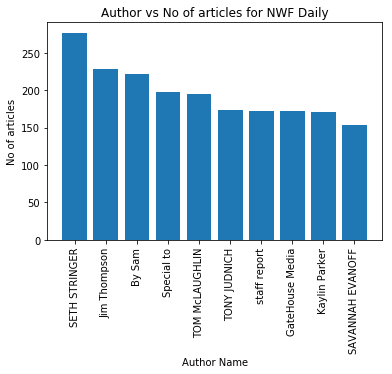

In [149]:
plot_graph(df, 'Author vs No of articles for NWF Daily')

In [162]:
gazette = inp_file[inp_file['source_name'].str.match('Gazette-mail')].sort_values('counts', ascending=False)
gazette['author'] = gazette['author'].str.replace('Staff reports', 'Staff report')
gazette[['author_fname', 'author_lname', 'email']] = gazette['author'].str.split(' ', 2, expand=True)
df = gazette.iloc[0:10, 1:5]
df['author'] = df[['author_fname', 'author_lname']].apply(lambda x:' '.join(x), axis=1)
df

,author,counts,author_fname,author_lname
1882,Staff reports,344,Staff,reports
1880,Staff report,216,Staff,report
1924,Tom Bragg,202,Tom,Bragg
1836,Rick Ryan,158,Rick,Ryan
1837,Rick Steelhammer,152,Rick,Steelhammer
1448,Bill Lynch,152,Bill,Lynch
1812,Phil Kabler,137,Phil,Kabler
1709,Lacie Pierson,125,Lacie,Pierson
1862,Ryan Quinn,124,Ryan,Quinn
1856,Ryan Pritt,123,Ryan,Pritt


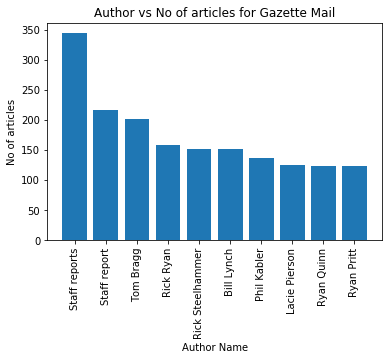

In [164]:
plot_graph(df, 'Author vs No of articles for Gazette Mail')

In [165]:
enid = inp_file[inp_file['source_name'].str.match('Enid News')].sort_values('counts', ascending=False)
df = enid.iloc[0:10, 1:3]
df


,author,counts
1178,Cass Rains,588
1247,James Neal,518
1320,Mitchell Willetts,481
1223,Enid News & Eagle,450
1350,Ryan Miller,226
1226,Enid News & Eagle Editorial Board,162
1200,Dave Ruthenberg,142
1380,Tim Godfrey,141
1151,By Tim Godfrey Staff Writer,124
1074,By Cass Rains Staff Writer,113


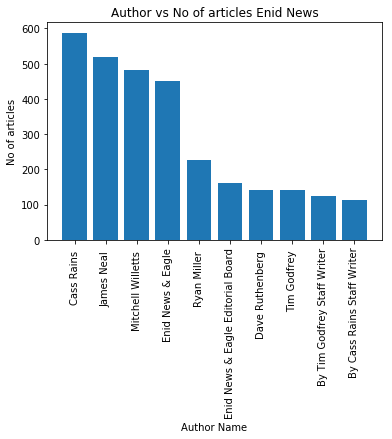

In [166]:
plot_graph(df, 'Author vs No of articles Enid News')

In [168]:
nj_spotlight = inp_file[inp_file['source_name'].str.match('NJSpotlight')].sort_values('counts', ascending=False)
df = nj_spotlight.iloc[0:10, 1:3]
df


,author,counts
2114,Tom Johnson,234
2022,John Reitmeyer,220
2041,Lilo H. Stainton,190
1976,Colleen O'Dea,187
1968,Carly Sitrin,76
2067,NJTV News online,70
1961,Brenda Flanagan,60
2025,Jon Hurdle,51
2065,NJ Spotlight,50
2021,John Mooney,31


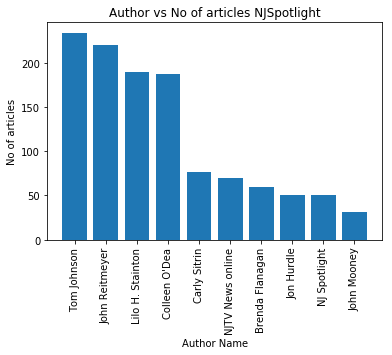

In [169]:
plot_graph(df, 'Author vs No of articles NJSpotlight')